<a href="https://colab.research.google.com/github/nattntn/7-23yrs_EffNet/blob/main/Transfer_with_Age/Test/7_23_03_Eff_Regress_Predict_Freeze_250_Unflipped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clone Efficient

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-23)/3_Re_1e-4_250_Freeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-23)/3_Re_1e-4_250_Freeze.h5')
height = width = model.input_shape[1]

#Prepare Data

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Multi_task(All)(7-23)/table_train_7_23_fold.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0
...,...,...,...,...,...,...,...,...,...
3780,3780,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE429.jpg,10,1
3781,3781,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E430.jpg,6,1
3782,3782,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE430.jpg,10,1
3783,3783,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E431.jpg,10,1


In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 3785 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Multi_task(All)(7-23)/table_test_7_23_forGender.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female
...,...,...,...,...,...,...,...,...,...
837,930,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
838,931,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
839,932,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
840,933,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


In [ ]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female
...,...,...,...,...,...,...,...,...
837,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
838,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
839,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
840,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


In [ ]:
# test7_14 = test[(test['Age(year)']>= 7)&(test['Age(year)']<= 14)]
# test7_14

In [ ]:
# test7_14 = test7_14.reset_index()
# test7_14

In [ ]:
# test7_14 = test7_14.iloc[:,1:]
# test7_14

In [ ]:
# test7_14.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/table_test_7_14_Age.csv') #save ลงไดร์ฟ

# Predict

In [ ]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 9s 9s/step


8.118996

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 31ms/step


In [ ]:
pred_list

[8.118996,
 7.803089,
 8.84898,
 7.5815134,
 8.657213,
 8.563739,
 7.7755966,
 5.833051,
 6.793908,
 8.260399,
 7.6613903,
 8.049236,
 7.162896,
 5.2217684,
 8.179451,
 8.921698,
 9.946432,
 9.081144,
 7.214863,
 7.4770427,
 7.8873563,
 8.600559,
 9.94981,
 8.555412,
 8.118673,
 8.2383,
 7.0367775,
 7.6321898,
 7.9711647,
 8.551792,
 6.712138,
 7.6889124,
 7.0870943,
 7.907261,
 8.134317,
 7.4960704,
 9.201018,
 8.175424,
 7.6044064,
 7.280942,
 6.656459,
 7.0558352,
 8.766682,
 10.826257,
 8.572041,
 7.711258,
 7.3826914,
 6.9023776,
 6.609434,
 9.900421,
 9.173156,
 9.900191,
 8.851122,
 8.650429,
 9.48284,
 8.783805,
 8.955772,
 7.797979,
 8.983841,
 8.922936,
 9.141478,
 9.198957,
 9.592186,
 8.926317,
 9.151811,
 9.478602,
 8.990961,
 8.94629,
 8.86166,
 8.75732,
 9.006843,
 7.883191,
 7.3907638,
 7.7732162,
 7.340928,
 9.305281,
 9.929934,
 7.7851686,
 9.256336,
 9.305281,
 9.929934,
 8.5614395,
 8.629445,
 8.6241,
 8.084155,
 9.173409,
 9.2626705,
 7.5621414,
 8.273497,
 9.07831

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
pred_int = np.around(pred_list)

In [ ]:
#แปลงเป็น array
pred = np.array(pred_int)
act = np.array(act)

In [ ]:
pred

array([ 8.,  8.,  9.,  8.,  9.,  9.,  8.,  6.,  7.,  8.,  8.,  8.,  7.,
        5.,  8.,  9., 10.,  9.,  7.,  7.,  8.,  9., 10.,  9.,  8.,  8.,
        7.,  8.,  8.,  9.,  7.,  8.,  7.,  8.,  8.,  7.,  9.,  8.,  8.,
        7.,  7.,  7.,  9., 11.,  9.,  8.,  7.,  7.,  7., 10.,  9., 10.,
        9.,  9.,  9.,  9.,  9.,  8.,  9.,  9.,  9.,  9., 10.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  8.,  7.,  8.,  7.,  9., 10.,  8.,
        9.,  9., 10.,  9.,  9.,  9.,  8.,  9.,  9.,  8.,  8.,  9.,  8.,
       10.,  9.,  8., 11., 13.,  8.,  8., 10., 11., 11., 10., 10., 10.,
        9.,  8.,  9., 10., 10., 10.,  8.,  9., 10., 10.,  9., 10.,  9.,
        9., 11.,  8.,  9.,  9.,  9.,  8.,  8.,  9.,  9.,  8.,  9.,  9.,
        8.,  9., 10.,  8.,  9., 10., 11.,  8.,  9., 10.,  9., 10.,  9.,
        9.,  9., 11., 11., 11., 10.,  9., 10., 10., 11.,  9.,  8., 10.,
       11.,  9.,  8., 10., 10., 11., 12., 10., 12., 11.,  9.,  9.,  8.,
        8., 10., 11.,  8.,  9., 10., 12.,  8.,  8.,  8.,  9., 10

#confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 22.565320665083135%
              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.88      0.30      0.45        50
         8.0       0.18      0.19      0.18        48
         9.0       0.22      0.36      0.27        50
        10.0       0.22      0.24      0.23        49
        11.0       0.27      0.34      0.30        50
        12.0       0.36      0.42      0.38        48
        13.0       0.35      0.46      0.40        50
        14.0       0.17      0.21      0.19        47
        15.0       0.21      0.24      0.22        51
        16.0       0.17      0.24      0.20        50
        17.0       0.20      0.25      0.22        51
        18.0       0.10      0.12      0.11        50
        19.0       0.22      0.27      0.24        49
        20.0       0.12      0.12      0.12        49
        21.0       0.12      0.04      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

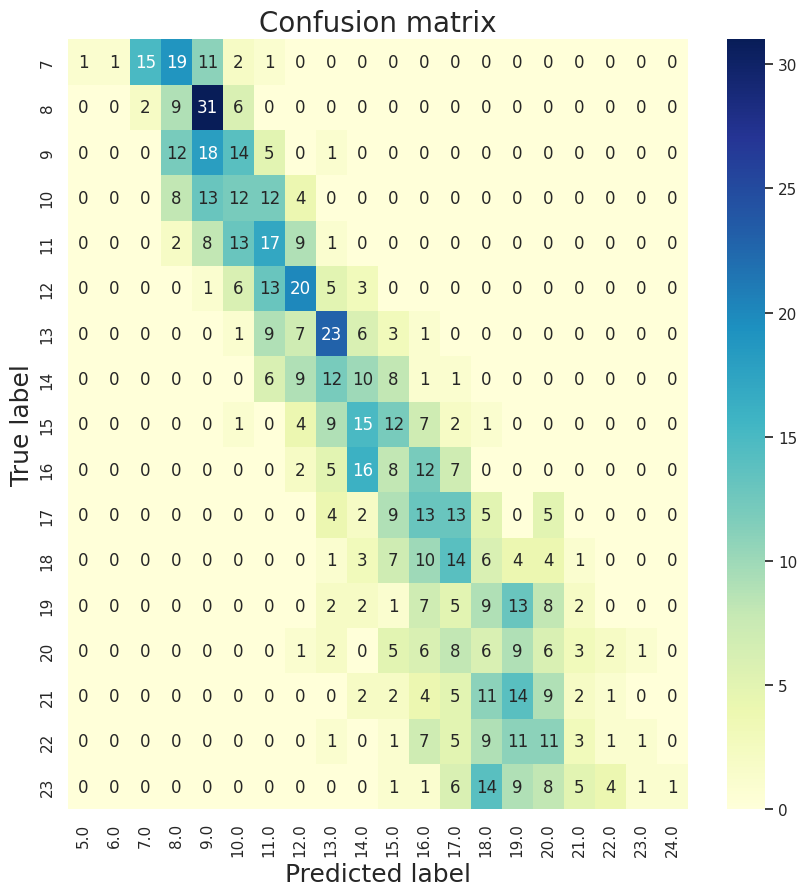

In [ ]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.6460807600950118
MSE: 5.123515439429929
RMSE: 2.263518376207697


In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act, pred, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act, pred, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act, pred, multioutput= 'variance_weighted'))

R-squared: 0.7866308050472637
R-squared: [0.78663081]
R-squared: 0.7866308050472637
